## Workshop 6

In this workshop we will be moving onto linear regression, a simple but essential tool for data analysis. We will be using housing data with different

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
houses = pd.read_csv('House_data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

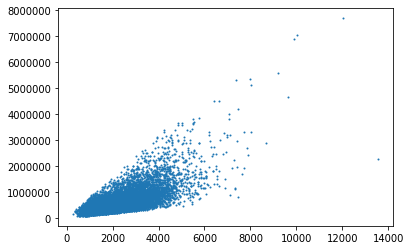

In [14]:
plt.scatter(houses['sqft_living'], houses['price'], s=1)

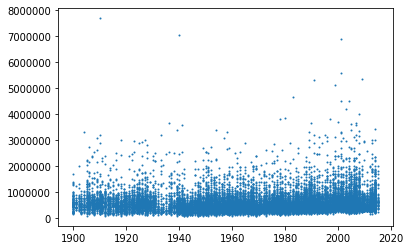

In [15]:
plt.scatter(houses['yr_built'], houses['price'], s=1)

In [126]:
hzips = houses['zipcode']
hcounts = hzips.value_counts()
print(type(hcounts))
print(hcounts)

<class 'pandas.core.series.Series'>
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


In [132]:
zindex = hcounts.index

[584919.2109634551, 366867.6, 619900.5471698113, 645231.456445993, 576795.007233273, 311632.10583941604, 521652.8587155963, 417637.43307086616, 286732.79158316634, 859684.7791164658, 386997.3967611336, 493552.53205128206, 353608.63516483514, 423725.69506726455, 685605.775510204, 803719.5231481482, 616990.5922330098, 469455.77073170734, 420890.54926108377, 678163.0592592593, 280804.6906077348, 790576.6545961003, 424706.3559322034, 334921.0626780627, 594547.6501457726, 319581.3940298507, 618634.1696969697, 612653.6105919003, 1355927.0820189274, 791820.807570978, 527961.2032258065, 634360.1793103449, 359483.2395833333, 462480.035335689, 645507.3780918728, 1194230.0212765958, 302878.8821428571, 294111.27857142856, 300539.8905109489, 569958.4652014652, 240328.3717472119, 1095499.342007435, 304262.1082089552, 579053.4172932331, 551688.6730038023, 310612.75572519086, 296187.98046875, 676185.3921568628, 464231.8385826772, 315709.30341880344, 862825.2314410481, 439471.0814479638, 234284.0351758

<BarContainer object of 70 artists>

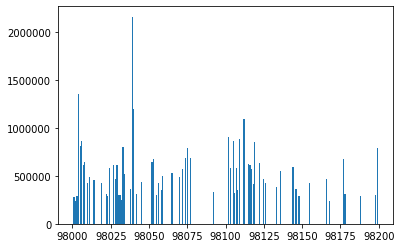

In [137]:
zip_means=[]
for i in hcounts.index:
    bool_i = houses['zipcode']==i
    zipp_i = houses.loc[bool_i, 'price'].mean()
    zip_means.append(zipp_i)
    
print(zip_means)

#bool1 = houses['zipcode']==98103
#zipex = houses.loc[bool1, 'price']
#zipex
plt.bar(zindex,zip_means)


Play around with another dataset!!

3 accuracy metrics:
MAE,MSE,RMSE
    